In [1]:
import pandas as pd

# Define the file path
file_path = "E:\\Dataset\\5-Site_DG-PV1-DB-DG-M1A.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Convert the first column to datetime
data['timestamp'] = pd.to_datetime(data.iloc[:, 0])

# Filter the data for the year 2020
filtered_data_2020 = data[(data['timestamp'] >= '2020-01-01 00:00:00') & (data['timestamp'] <= '2020-12-31 23:55:00')]

# Save the filtered data to a new CSV file
output_path = "oneyear_2020_Yulara.csv"
filtered_data_2020.to_csv(output_path, index=False)

output_path


FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Dataset\\5-Site_DG-PV1-DB-DG-M1A.csv'

In [2]:
import pandas as pd

# 读取数据
file_path = "oneyear_2020_Yulara.csv"
data = pd.read_csv(file_path)

# 删除第二列和第三列（假设是按顺序的第二和第三列）
data = data.drop(data.columns[[1,2]], axis=1)

# 确保timestamp列为datetime类型
data['timestamp'] = pd.to_datetime(data['timestamp'])

# 提取时间特征，新增月、日、小时、分钟列
data['Month'] = data['timestamp'].dt.month
data['Day'] = data['timestamp'].dt.day
data['Hour'] = data['timestamp'].dt.hour
data['Minute'] = data['timestamp'].dt.minute

# 仅对数值列检查空值并填充
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna((col.shift() + col.shift(-1)) / 2))

# 如果首尾数据为空，因为无法用前后均值填充，可以选择用前一个或后一个数据进行填充
data[numeric_cols] = data[numeric_cols].fillna(method='ffill').fillna(method='bfill')

# 保存处理后的数据
output_path = "oneyear_cleaned_with_time_features_Yulara.csv"
data.to_csv(output_path, index=False)

print("数据处理完成，已保存为 oneyear_cleaned_with_time_features_Yulara.csv")


C:\Users\bo.chen18\AppData\Local\Temp\ipykernel_64400\1593120527.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[numeric_cols] = data[numeric_cols].fillna(method='ffill').fillna(method='bfill')


数据处理完成，已保存为 oneyear_cleaned_with_time_features_Yulara.csv


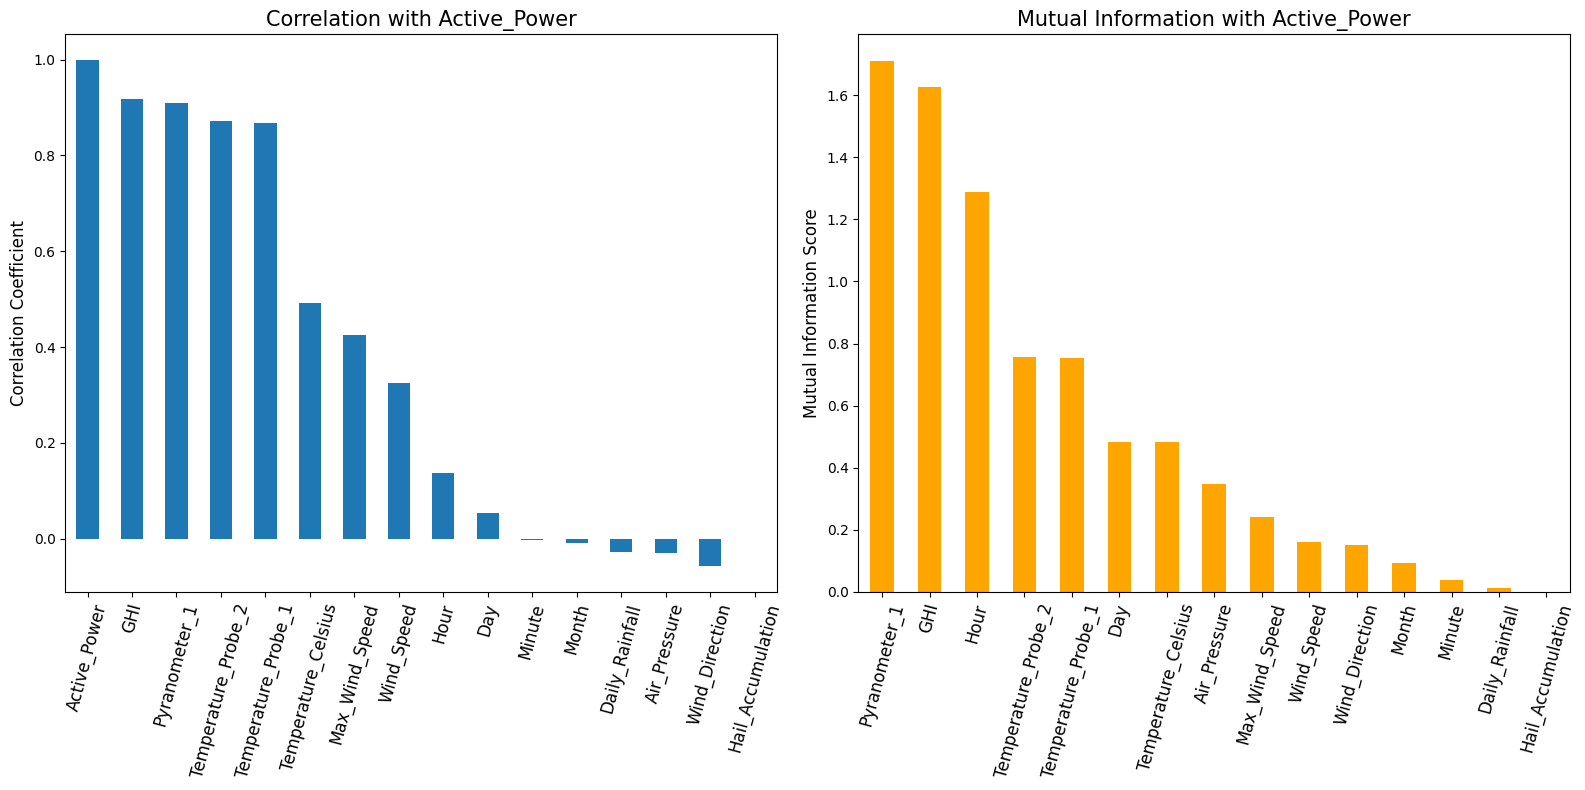

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# 读取数据
file_path = "oneyear_cleaned_with_time_features_Yulara.csv"
data = pd.read_csv(file_path)

# 选择前10000条数据
data_subset = data.head(10000)

# 删除 timestamp 列
data_subset = data_subset.drop(columns=['timestamp'])

# 进行相关性分析，y为Active_Power
correlation_matrix = data_subset.corr()
active_power_corr = correlation_matrix['Active_Power'].sort_values(ascending=False)

# 进行互信息分析，y为Active_Power
X = data_subset.drop(columns=['Active_Power'])
y = data_subset['Active_Power']

mutual_info = mutual_info_regression(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)

# 函数来简化标签
def simplify_labels(labels):
    new_labels = []
    for label in labels:
        label = label.replace("Weather_", "")
        if label == "Global_Horizontal_Radiation":
            label = "GHI"
        new_labels.append(label)
    return new_labels

# 可视化相关性排名
plt.figure(figsize=(16, 8))  # 调整图形大小
plt.subplot(1, 2, 1)
active_power_corr.plot(kind='bar')
plt.title('Correlation with Active_Power', fontsize=15)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(ticks=range(len(active_power_corr.index)), labels=simplify_labels(active_power_corr.index), fontsize=12, rotation=75)

# 可视化互信息排名
plt.subplot(1, 2, 2)
mutual_info_series.plot(kind='bar', color='orange')
plt.title('Mutual Information with Active_Power', fontsize=15)
plt.ylabel('Mutual Information Score', fontsize=12)
plt.xticks(ticks=range(len(mutual_info_series.index)), labels=simplify_labels(mutual_info_series.index), fontsize=12, rotation=75)

# 显示图表
plt.tight_layout()
plt.savefig("MI_correlation_analysis.jpg", dpi=300)  # 保存图片，分辨率为600dpi
plt.show()


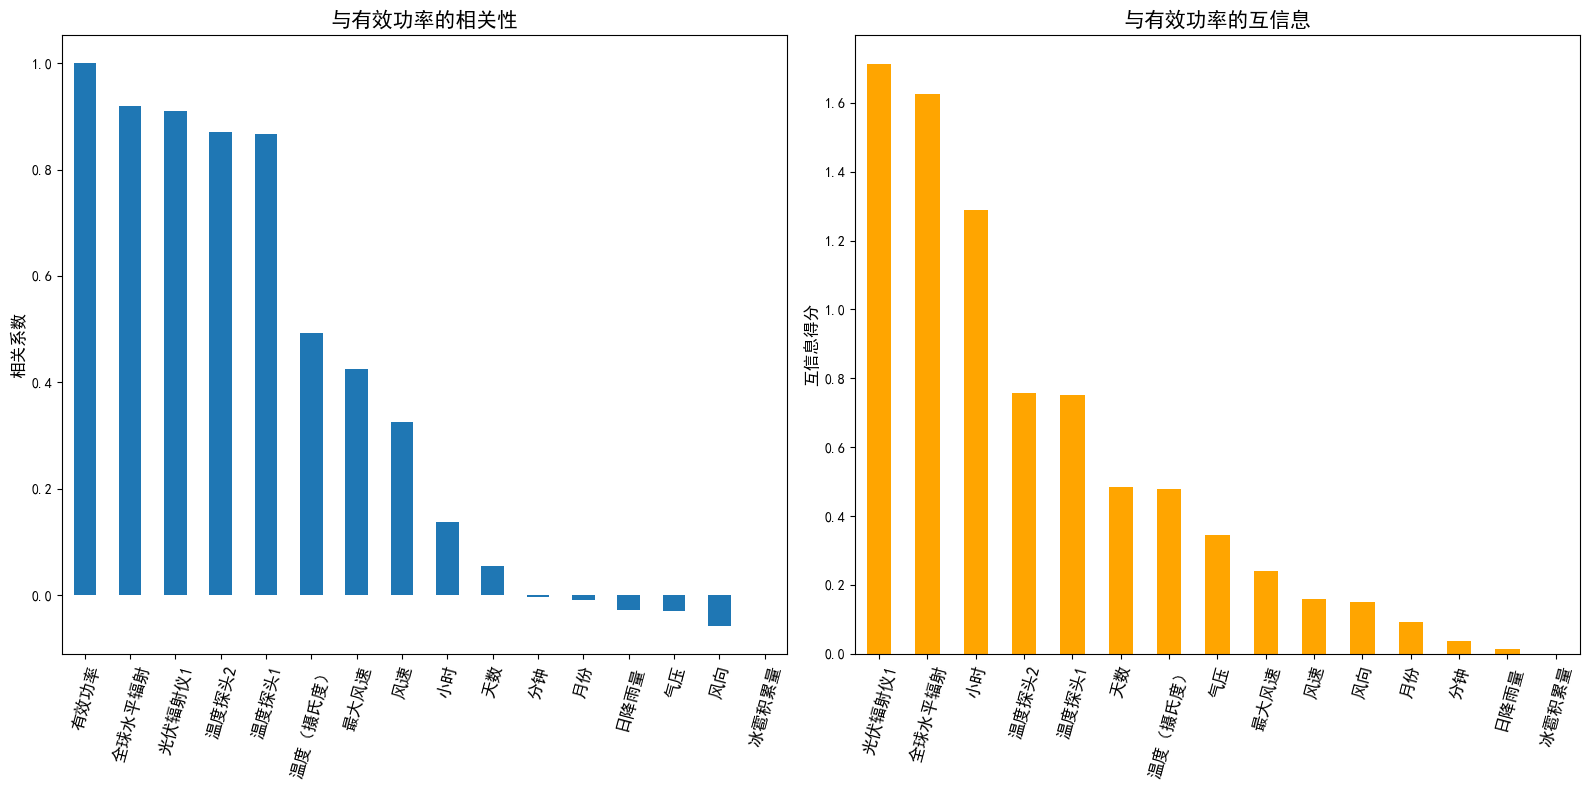

In [5]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 设置黑体为默认字体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 读取数据
file_path = "oneyear_cleaned_with_time_features_Yulara.csv"
data = pd.read_csv(file_path)

# 选择前10000条数据
data_subset = data.head(10000)

# 删除 timestamp 列
data_subset = data_subset.drop(columns=['timestamp'])

# 进行相关性分析，y为Active_Power
correlation_matrix = data_subset.corr()
active_power_corr = correlation_matrix['Active_Power'].sort_values(ascending=False)

# 进行互信息分析，y为Active_Power
X = data_subset.drop(columns=['Active_Power'])
y = data_subset['Active_Power']

mutual_info = mutual_info_regression(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)

# 英文到中文的变量名映射
column_name_map = {
    "Active_Power": "有效功率",
    "Wind_Speed": "风速",
    "Weather_Temperature_Celsius": "温度（摄氏度）",
    "Global_Horizontal_Radiation": "全球水平辐射",
    "Wind_Direction": "风向",
    "Weather_Daily_Rainfall": "日降雨量",
    "Max_Wind_Speed": "最大风速",
    "Air_Pressure": "气压",
    "Hail_Accumulation": "冰雹积累量",
    "Pyranometer_1": "光伏辐射仪1",
    "Temperature_Probe_1": "温度探头1",
    "Temperature_Probe_2": "温度探头2",
    "Month": "月份",
    "Day": "天数",
    "Hour": "小时",
    "Minute": "分钟"
}

# 转换变量名为中文
def translate_labels(labels):
    return [column_name_map.get(label, label) for label in labels]

# 可视化相关性排名
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
active_power_corr.plot(kind='bar')
plt.title('与有效功率的相关性', fontsize=15)
plt.ylabel('相关系数', fontsize=12)
plt.xticks(
    ticks=range(len(active_power_corr.index)),
    labels=translate_labels(active_power_corr.index),
    fontsize=12,
    rotation=75
)

# 可视化互信息排名
plt.subplot(1, 2, 2)
mutual_info_series.plot(kind='bar', color='orange')
plt.title('与有效功率的互信息', fontsize=15)
plt.ylabel('互信息得分', fontsize=12)
plt.xticks(
    ticks=range(len(mutual_info_series.index)),
    labels=translate_labels(mutual_info_series.index),
    fontsize=12,
    rotation=75
)
# 显示图表
plt.tight_layout()
plt.savefig("MI_correlation_analysis_CN.jpg", dpi=300)  # 保存图片，分辨率为600dpi
plt.show()

In [21]:
data.isnull().sum()

timestamp                      0
Active_Power                   0
Wind_Speed                     0
Weather_Temperature_Celsius    0
Global_Horizontal_Radiation    0
Wind_Direction                 0
Weather_Daily_Rainfall         0
Max_Wind_Speed                 0
Air_Pressure                   0
Hail_Accumulation              0
Pyranometer_1                  0
Temperature_Probe_1            0
Temperature_Probe_2            0
Month                          0
Day                            0
Hour                           0
Minute                         0
dtype: int64

In [22]:
# 删除指定的列
columns_to_drop = ['Hail_Accumulation', 'Weather_Daily_Rainfall', 'Minute', 'Month', 'Wind_Direction']
data_cleaned = data.drop(columns=columns_to_drop)

# 保存保留的变量为新的数据集
output_path = "cleaned_data_Yulara.csv"
data_cleaned.to_csv(output_path, index=False)

print(f"数据处理完成，已保存为 {output_path}")


数据处理完成，已保存为 cleaned_data_Yulara.csv


In [23]:
data_cleaned.describe()

,Active_Power,Wind_Speed,Weather_Temperature_Celsius,Global_Horizontal_Radiation,Max_Wind_Speed,Air_Pressure,Pyranometer_1,Temperature_Probe_1,Temperature_Probe_2,Day,Hour
count,104343.000000,104343.000000,104343.000000,104343.000000,104343.000000,104343.000000,104343.000000,104343.000000,104343.000000,104343.000000,104343.000000
mean,151.417803,2.181546,23.313097,251.237650,4.081738,956.943410,267.837416,43.892356,44.058372,15.756332,11.515588
std,203.778614,1.244848,8.846848,346.155535,2.307433,5.182452,366.222539,10.376778,10.547804,8.828201,6.930072
min,-0.243006,0.026667,0.260000,-14.214956,0.200000,942.289978,-11.688478,30.379993,30.373768,1.000000,0.000000
25%,-0.152119,1.220000,16.776667,-3.485861,2.200000,952.996643,-3.256490,36.121273,35.932014,8.000000,5.000000
50%,0.137045,2.056667,23.849998,2.191776,3.900000,956.920044,2.194939,40.981995,40.899422,16.000000,12.000000
75%,329.245529,2.956667,30.056667,505.646561,5.600000,960.900024,546.226562,49.569094,50.546227,23.000000,18.000000
max,801.544373,13.790000,44.563332,1468.510132,21.900000,971.063293,1431.717285,81.767830,80.193459,31.000000,23.000000


In [24]:
# 使用 3σ 原则去除异常值
for column in data_cleaned.columns:
    if data_cleaned[column].dtype in ['float64', 'int64']:  # 仅对数值列进行处理
        mean = data_cleaned[column].mean()
        std = data_cleaned[column].std()
        upper_bound = mean + 3 * std
        lower_bound = mean - 3 * std
        # 找到异常值的位置
        outliers = (data_cleaned[column] > upper_bound) | (data_cleaned[column] < lower_bound)
        # 用前后邻近数据的均值替换异常值
        data_cleaned.loc[outliers, column] = data_cleaned[column].shift(1).fillna(method='bfill').where(outliers, data_cleaned[column]) + \
                                     data_cleaned[column].shift(-1).fillna(method='ffill').where(outliers, data_cleaned[column])
        data_cleaned.loc[outliers, column] /= 2

# 将指定列的负值替换为 0.001
columns_to_replace = ['Active_Power', 'Wind_Speed', 'Global_Horizontal_Radiation', 'Air_Pressure']
for column in columns_to_replace:
    data_cleaned[column] = data_cleaned[column].apply(lambda x: 0.001 if x < 0 else x)

# 保存处理后的数据
output_path = "cleaned_data_final_Yulara.csv"
data_cleaned.to_csv(output_path, index=False)

print(f"数据处理完成，已保存为 {output_path}")

C:\Users\bo.chen18\AppData\Local\Temp\ipykernel_36624\1559321763.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_cleaned.loc[outliers, column] = data_cleaned[column].shift(1).fillna(method='bfill').where(outliers, data_cleaned[column]) + \
C:\Users\bo.chen18\AppData\Local\Temp\ipykernel_36624\1559321763.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_cleaned[column].shift(-1).fillna(method='ffill').where(outliers, data_cleaned[column])
C:\Users\bo.chen18\AppData\Local\Temp\ipykernel_36624\1559321763.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_cleaned.loc[outliers, column] = data_cleaned[column].shift(1).fillna(method='bfill').where(outliers, data_cleaned[column]) + \
C:\Users\bo.chen18\AppD

数据处理完成，已保存为 cleaned_data_final_Yulara.csv
